<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/%E5%9F%BA%E6%96%BC%E6%B3%A8%E6%84%8F%E5%8A%9B%E6%A9%9F%E5%88%B6%E5%9B%9E%E6%AD%B8%E6%A8%A1%E5%9E%8BV2(%E7%B5%B2%E7%8B%80%E8%8F%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdataset.csv',index_col = 0)
df = df.dropna(axis=0)
df = df.reset_index()
df['date'] = df['date'].astype('str')
df

,date,site,cindex,cName,classification,confidence,D
0,20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.371431,39.638027
1,20210927,T753,116,絲狀菌,116_絲狀菌,0.996904,18.817467
2,20210927,T753,125,膜袋蟲,125_膜袋蟲,0.828820,35.845880
3,20210927,T753,116,絲狀菌,116_絲狀菌,0.418498,32.625321
4,20210927,T753,116,絲狀菌,116_絲狀菌,0.998210,22.131402
...,...,...,...,...,...,...,...
954460,20230216,T753,118,尾絲蟲,118_尾絲蟲,0.997261,41.925688
954461,20230216,T753,116,絲狀菌,116_絲狀菌,0.975901,86.942615
954462,20230216,T753,118,尾絲蟲,118_尾絲蟲,0.819361,31.534747
954463,20230216,T753,127,滴蟲,127_滴蟲,0.896282,43.294135


In [3]:
#對蟲和時間進行遍歷
new_dict = {}
df = df[df.cName=='絲狀菌']#在這裡指定種類
for i in df.cName.unique():
  new_dict[i] = pd.DataFrame()#用來存放特定蟲的資料
  for j in tqdm(df.date.unique()):
    # 特定蟲種類在特定日期的狀況
    d = df[(df['cName']==i)&(df['date']==j)]
    # 按照百分位方式分四組Q1,Q2,Q3
    Q1,Q2,Q3 = d['D'].quantile([0.25, 0.5, 0.75]).values
    # 計算各筆資料的D值算是屬於哪一組
    d['bin'] = d['D'].apply(lambda x: 'Q1' if x <= Q1 else ('Q2' if x <= Q2 else ('Q3' if x <= Q3 else 'Q4')))
    new_dict[i][j] = d.groupby('bin').size()
    print(i,j)# 顯示蟲名稱和時間
    print(d.groupby('bin').size()) #顯示各組筆數

  0%|          | 0/279 [00:00<?, ?it/s]

絲狀菌 20210927
bin
Q1    232
Q2    223
Q3    225
Q4    225
dtype: int64
絲狀菌 20210928
bin
Q1    191
Q2    189
Q3    189
Q4    189
dtype: int64
絲狀菌 20210929
bin
Q1    210
Q2    210
Q3    209
Q4    210
dtype: int64
絲狀菌 20210930
bin
Q1    231
Q2    230
Q3    229
Q4    227
dtype: int64
絲狀菌 20211004
bin
Q1    173
Q2    172
Q3    171
Q4    172
dtype: int64
絲狀菌 20211005
bin
Q1    147
Q2    142
Q3    146
Q4    143
dtype: int64
絲狀菌 20211006
bin
Q1    197
Q2    194
Q3    195
Q4    196
dtype: int64
絲狀菌 20211007
bin
Q1    209
Q2    209
Q3    207
Q4    208
dtype: int64
絲狀菌 20211008
bin
Q1    204
Q2    202
Q3    203
Q4    203
dtype: int64
絲狀菌 20211014
bin
Q1    1627
Q2    1619
Q3    1604
Q4    1616
dtype: int64
絲狀菌 20211015
bin
Q1    1631
Q2    1630
Q3    1627
Q4    1627
dtype: int64
絲狀菌 20211018
bin
Q1    1500
Q2    1476
Q3    1490
Q4    1481
dtype: int64
絲狀菌 20211019
bin
Q1    1667
Q2    1670
Q3    1653
Q4    1658
dtype: int64
絲狀菌 20211020
bin
Q1    1714
Q2    1667
Q3    1687
Q4    1684
dtype: int64


In [5]:
new_dict

{'絲狀菌':      20210927  20210928  20210929  20210930  20211004  20211005  20211006  \
 bin                                                                         
 Q1        232       191       210       231       173       147       197   
 Q2        223       189       210       230       172       142       194   
 Q3        225       189       209       229       171       146       195   
 Q4        225       189       210       227       172       143       196   
 
      20211007  20211008  20211014  ...  20230203  20230206  20230207  \
 bin                                ...                                 
 Q1        209       204      1627  ...        35        50        42   
 Q2        209       202      1619  ...        34        50        42   
 Q3        207       203      1604  ...        34        49        40   
 Q4        208       203      1616  ...        35        50        42   
 
      20230208  20230209  20230210  20230213  20230214  20230215  20230216  
 bin  

In [6]:
'''
df2 = pd.DataFrame()
for i in df['date'].unique():
  df2[i] = df[df['date']==i].D.quantile(q=np.arange(0, 1.1, 0.1))
df2
'''

"\ndf2 = pd.DataFrame()\nfor i in df['date'].unique():\n  df2[i] = df[df['date']==i].D.quantile(q=np.arange(0, 1.1, 0.1))\ndf2\n"

In [17]:
df2 = new_dict['絲狀菌']
df2

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,232,191,210,231,173,147,197,209,204,1627,...,35,50,42,50,50,28,34,31,42,41
Q2,223,189,210,230,172,142,194,209,202,1619,...,34,50,42,50,49,27,34,30,42,40
Q3,225,189,209,229,171,146,195,207,203,1604,...,34,49,40,49,49,27,34,30,41,40
Q4,225,189,210,227,172,143,196,208,203,1616,...,35,50,42,50,49,28,34,30,42,40


In [18]:
def normalize(df):
    for col in df.columns:
        df[col] = df[col] / df[col].sum()
    return df

df2 = normalize(df2.copy())
df2

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,0.256354,0.251979,0.250298,0.251908,0.251453,0.254325,0.251918,0.250900,0.251232,0.251624,...,0.253623,0.251256,0.253012,0.251256,0.253807,0.254545,0.25,0.256198,0.251497,0.254658
Q2,0.246409,0.249340,0.250298,0.250818,0.250000,0.245675,0.248082,0.250900,0.248768,0.250387,...,0.246377,0.251256,0.253012,0.251256,0.248731,0.245455,0.25,0.247934,0.251497,0.248447
Q3,0.248619,0.249340,0.249106,0.249727,0.248547,0.252595,0.249361,0.248499,0.250000,0.248067,...,0.246377,0.246231,0.240964,0.246231,0.248731,0.245455,0.25,0.247934,0.245509,0.248447
Q4,0.248619,0.249340,0.250298,0.247546,0.250000,0.247405,0.250639,0.249700,0.250000,0.249923,...,0.253623,0.251256,0.253012,0.251256,0.248731,0.254545,0.25,0.247934,0.251497,0.248447


In [19]:
df2.sum(axis=0)

20210927    1.0
20210928    1.0
20210929    1.0
20210930    1.0
20211004    1.0
           ... 
20230210    1.0
20230213    1.0
20230214    1.0
20230215    1.0
20230216    1.0
Length: 279, dtype: float64

# batch,features_size,time_step

In [20]:
import numpy as np

X_train = []
y_train = []

for i in range(0, len(df2.columns), 14):
    x = df2.iloc[:,i:i+7].values
    y = df2.iloc[:,i+7:i+14].values
    cond1 = x.shape[1] == 7
    cond2 = y.shape[1] == 7
    if cond1 and cond2 :
      X_train.append(x)
      y_train.append(y)

X = np.array(X_train)
y = np.array(y_train)

print(X.shape, y.shape)


(19, 4, 7) (19, 4, 7)


# 基於注意力機制(transformer核心精神)的回歸模型

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionModule(nn.Module):
    def __init__(self, input_channels):
        super(AttentionModule, self).__init__()

        self.query_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels // 2, kernel_size=1)
        self.key_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels // 2, kernel_size=1)
        self.value_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels, kernel_size=1)

        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, channels, width = x.size()

        proj_query = self.query_conv(x).view(batch_size, -1, width).permute(0, 2, 1)
        proj_key = self.key_conv(x).view(batch_size, -1, width)
        energy = torch.bmm(proj_query, proj_key)

        attention = F.softmax(energy, dim=-1)
        #attention = F.normalize(energy, p=1, dim=-1)

        proj_value = self.value_conv(x).view(batch_size, -1, width)
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(batch_size, channels, width)

        out = self.gamma * out + x
        return out,attention

class AttentionModel(nn.Module):
    def __init__(self):
        super(AttentionModel, self).__init__()

        self.attention = AttentionModule(input_channels=4)

    def forward(self, x):
        x,attention = self.attention(x)
        return x,attention

# 測試模型
model = AttentionModel()
from sklearn.model_selection import train_test_split
input_matrix = torch.from_numpy(X).float()
target_matrix = torch.from_numpy(y).float()
X_train, X_test, y_train, y_test = train_test_split(input_matrix, target_matrix, test_size=0.33, random_state=42)
# Forward pass
output_tensor,attention = model(input_matrix)
print("Input shape:", input_matrix.shape)
print("Output shape:", output_tensor.shape)
print("attention shape:", attention.shape)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Input shape: torch.Size([19, 4, 7])
Output shape: torch.Size([19, 4, 7])
attention shape: torch.Size([19, 7, 7])
torch.Size([12, 4, 7]) torch.Size([7, 4, 7]) torch.Size([12, 4, 7]) torch.Size([7, 4, 7])


In [22]:
print("Input Matrix:")
print(input_matrix)
print("Output Matrix after Attention:")
print(output_tensor)
print('attn_weights')
print(attention)

Input Matrix:
tensor([[[0.2564, 0.2520, 0.2503, 0.2519, 0.2515, 0.2543, 0.2519],
         [0.2464, 0.2493, 0.2503, 0.2508, 0.2500, 0.2457, 0.2481],
         [0.2486, 0.2493, 0.2491, 0.2497, 0.2485, 0.2526, 0.2494],
         [0.2486, 0.2493, 0.2503, 0.2475, 0.2500, 0.2474, 0.2506]],

        [[0.2526, 0.2504, 0.2534, 0.2524, 0.2538, 0.2514, 0.2521],
         [0.2490, 0.2513, 0.2496, 0.2492, 0.2485, 0.2507, 0.2486],
         [0.2488, 0.2482, 0.2469, 0.2484, 0.2484, 0.2480, 0.2493],
         [0.2495, 0.2500, 0.2500, 0.2500, 0.2493, 0.2499, 0.2499]],

        [[0.2517, 0.2501, 0.2518, 0.2513, 0.2515, 0.2507, 0.2515],
         [0.2483, 0.2514, 0.2497, 0.2492, 0.2503, 0.2498, 0.2485],
         [0.2483, 0.2490, 0.2497, 0.2497, 0.2479, 0.2507, 0.2500],
         [0.2517, 0.2495, 0.2487, 0.2497, 0.2503, 0.2489, 0.2500]],

        [[0.2537, 0.2518, 0.2506, 0.2513, 0.2546, 0.2520, 0.2520],
         [0.2493, 0.2496, 0.2500, 0.2501, 0.2469, 0.2493, 0.2492],
         [0.2477, 0.2500, 0.2494, 0.2485, 

# 訓練模型

In [23]:
import torch.optim as optim

# 定義損失函數和優化器
criterion = nn.SmoothL1Loss()  # 使用均方誤差作為損失函數
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 使用Adam優化器

# 訓練模型
num_epochs = 100
torch_input = X_train
target = y_train
loss_list = []

for epoch in range(num_epochs):
    # 將模型設置為訓練模式
    model.train()

    # 前向傳播
    output = model(torch_input)

    # 計算損失
    loss = criterion(output[0], target[0])  # 這裡的target是你的目標輸出，需要根據你的任務而定
    loss_list.append(loss.detach())

    # 反向傳播 梯度下降 清空梯度
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # 每隔一段時間印出一次損失
    if epoch % 5 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# 訓練完成後，你可以使用模型進行預測
model.eval()
final_output = model(torch_input)
print("Final Model Output:")


Epoch 0/100, Loss: 1.1350517752362066e-06
Epoch 5/100, Loss: 1.1228801213292172e-06
Epoch 10/100, Loss: 1.1243946573813446e-06
Epoch 15/100, Loss: 1.1221237627978553e-06
Epoch 20/100, Loss: 1.1227343748032581e-06
Epoch 25/100, Loss: 1.1217965720788925e-06
Epoch 30/100, Loss: 1.1218477311558672e-06
Epoch 35/100, Loss: 1.1214470987397362e-06
Epoch 40/100, Loss: 1.1213149946343037e-06
Epoch 45/100, Loss: 1.1210619277335354e-06
Epoch 50/100, Loss: 1.1208951491425978e-06
Epoch 55/100, Loss: 1.1206748240510933e-06
Epoch 60/100, Loss: 1.1204987231394625e-06
Epoch 65/100, Loss: 1.12029226784216e-06
Epoch 70/100, Loss: 1.1201025245100027e-06
Epoch 75/100, Loss: 1.1199033451703144e-06
Epoch 80/100, Loss: 1.1197026879017358e-06
Epoch 85/100, Loss: 1.1195030538146966e-06
Epoch 90/100, Loss: 1.1193001228093635e-06
Epoch 95/100, Loss: 1.1190942359462497e-06
Final Model Output:


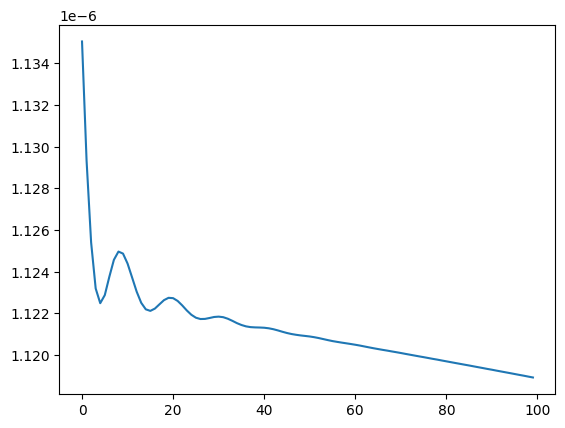

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [25]:
final_output[0][0]

tensor([[0.2519, 0.2503, 0.2506, 0.2504, 0.2507, 0.2517, 0.2513],
        [0.2494, 0.2507, 0.2524, 0.2504, 0.2497, 0.2499, 0.2499],
        [0.2487, 0.2504, 0.2476, 0.2492, 0.2503, 0.2487, 0.2492],
        [0.2505, 0.2490, 0.2498, 0.2504, 0.2497, 0.2500, 0.2500]],
       grad_fn=<SelectBackward0>)

In [26]:
y_train[0]

tensor([[0.2503, 0.2518, 0.2504, 0.2517, 0.2508, 0.2507, 0.2502],
        [0.2512, 0.2494, 0.2504, 0.2508, 0.2508, 0.2507, 0.2498],
        [0.2486, 0.2489, 0.2494, 0.2475, 0.2483, 0.2486, 0.2498],
        [0.2499, 0.2499, 0.2499, 0.2500, 0.2502, 0.2501, 0.2502]])

# test data predict

In [27]:
model.eval()
y_pred = model(y_test)

In [28]:
y_pred[0][0]

tensor([[0.2511, 0.2514, 0.2518, 0.2505, 0.2524, 0.2509, 0.2540],
        [0.2511, 0.2489, 0.2506, 0.2504, 0.2484, 0.2514, 0.2471],
        [0.2484, 0.2499, 0.2479, 0.2496, 0.2504, 0.2485, 0.2497],
        [0.2499, 0.2502, 0.2501, 0.2500, 0.2493, 0.2496, 0.2496]],
       grad_fn=<SelectBackward0>)

In [29]:
y_test[0]

tensor([[0.2509, 0.2512, 0.2516, 0.2503, 0.2522, 0.2508, 0.2539],
        [0.2509, 0.2488, 0.2504, 0.2502, 0.2482, 0.2512, 0.2469],
        [0.2485, 0.2500, 0.2481, 0.2497, 0.2505, 0.2486, 0.2499],
        [0.2497, 0.2500, 0.2499, 0.2497, 0.2490, 0.2494, 0.2494]])

In [30]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from math import sqrt

r2_score(y_test[0], y_pred[0][0].detach())

0.9178056918209937

In [31]:
sqrt(mean_squared_error(y_test[0], y_pred[0][0].detach()))

0.00017983491806477627

In [32]:
mean_absolute_percentage_error(y_test[0], y_pred[0][0].detach())

0.0007115396

In [33]:
res = pd.DataFrame()
res['r2'] = [r2_score(y_test[0], y_pred[0][0].detach())]
res['rmse'] = [sqrt(mean_squared_error(y_test[0], y_pred[0][0].detach()))]
res['mape'] = [mean_absolute_percentage_error(y_test[0], y_pred[0][0].detach())]
res

,r2,rmse,mape
0,0.917806,0.00018,0.000712
